<a href="https://colab.research.google.com/github/Adachi-Yoshitaka/zemikadai/blob/main/%E3%83%A9%E3%83%B3%E3%83%80%E3%83%A0%E3%83%95%E3%82%A9%E3%83%AC%E3%82%B9%E3%83%88%26%E5%9F%BA%E6%9C%AC%E7%9A%84%E3%81%AA%E3%83%86%E3%82%AD%E3%82%B9%E3%83%88%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [ ]:
# データを用意する------------------------------------------
df = pd.DataFrame()                                          # データフレーム初期化
n = 20                                                       # 1クラス毎のデータ数
for i in range(3):                                           # データ作成ループ
    if i == 0:
        x = pd.Series(np.random.uniform(0.5, 2.8, n))
        y = pd.Series(x * np.random.uniform(0.8, 1.2, n))
    elif i == 1:
        x = pd.Series(np.random.uniform(2.2, 3.8, n))
        y = pd.Series(np.random.uniform(0.5, 1.8, n))
    else:
        x = pd.Series(np.random.uniform(3.2, 3.8, n))
        y = pd.Series(np.random.uniform(2.2, 3.8, n))
    label = pd.Series(np.full(n, i))                         # ラベル（クラス）を作成
    temp_df = pd.DataFrame(np.c_[x, y, label])               # クラス毎のデータフレームを作成
    df = pd.concat([df, temp_df])                            # 作成されたクラス毎のデータを逐次結合
df.index = np.arange(0, len(df), 1)                          # index(行ラベル)を初期化

In [ ]:
# クラス毎のデータフレームに分離（プロット用）
class_0 = df[df[2] == 0]                                     # ラベル0を抽出
class_1 = df[df[2] == 1]                                     # ラベル1を抽出
class_2 = df[df[2] == 2]                                     # ラベル2を抽出

In [ ]:
print(class_2)

           0         1    2
40  3.376978  2.701241  2.0
41  3.389850  3.749316  2.0
42  3.489144  3.560866  2.0
43  3.311516  3.085084  2.0
44  3.582160  3.509051  2.0
45  3.551714  3.089563  2.0
46  3.520615  2.434104  2.0
47  3.208644  2.427351  2.0
48  3.374110  2.809875  2.0
49  3.344680  2.294701  2.0
50  3.325723  2.922552  2.0
51  3.269651  3.162450  2.0
52  3.594548  2.803957  2.0
53  3.519720  2.227658  2.0
54  3.347854  3.072264  2.0
55  3.208989  2.520493  2.0
56  3.437158  3.433793  2.0
57  3.406942  2.623939  2.0
58  3.679395  3.198562  2.0
59  3.598482  2.259661  2.0


In [ ]:
# 学習させる値(訓練データ)とクラス(正解ラベル)に分離
data = df[[0, 1]]                                            # 訓練データ
data_class = pd.Series(df[2])                                # 正解ラベル

In [ ]:
# 決定木による学習
clf = RandomForestClassifier(n_estimators=100,               # 決定木の数
                             criterion='gini',               # 不純度評価指標の種類(ジニ係数）
                             max_depth=3,                    # 木の深さ
                             min_samples_leaf=1,             # 1ノード（葉）の最小クラス数
                             max_features='auto')            # 最大特徴量数
clf.fit(data, data_class)                                    # フィッティング
r2 = clf.score(data, data_class)                             # 決定係数を算出

In [ ]:
# 決定境界可視化用
grid_line = np.arange(-10, 10, 0.05)                         # グリッドデータのための配列を生成
X, Y = np.meshgrid(grid_line, grid_line)                     # グリッドを作成
Z = clf.predict(np.array([X.ravel(), Y.ravel()]).T)          # .predictが使えるデータshapeに変換して予測
Z = Z.reshape(X.shape)                                       # 3Dプロットするためにshapeを再変換

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


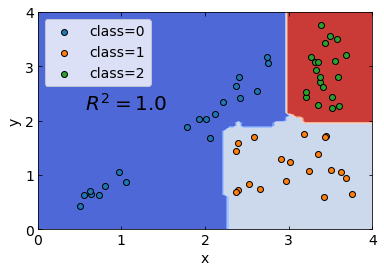

In [ ]:
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'
 
# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
 
fig = plt.figure()
ax1 = plt.subplot(111)
 
# グラフの上下左右に目盛線を付ける。
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
 
# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
 
# スケールの設定をする。
ax1.set_xlim(0, 4)
ax1.set_ylim(0, 4)
 
# データプロットする。
ax1.contourf(X, Y, Z, cmap='coolwarm')
ax1.scatter(class_0[0], class_0[1], label='class=0', edgecolors='black')
ax1.scatter(class_1[0], class_1[1], label='class=1', edgecolors='black')
ax1.scatter(class_2[0], class_2[1], label='class=2', edgecolors='black')
plt.text(0.5, 2.2, '$\ R^{2}=$' + str(round(r2, 2)), fontsize=20)
 
plt.legend()
 
# グラフを表示する。
plt.show()
plt.close()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

True

In [ ]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import graphviz
import numpy as np
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split

In [ ]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y)
clf = RandomForestClassifier(n_estimators=10, max_depth=2,
    min_samples_split=2, random_state=0)
clf = clf.fit(X_train, y_train)

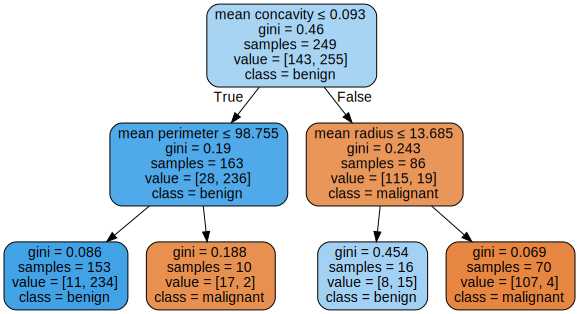

In [ ]:
dot_data = tree.export_graphviz(clf[0], out_file=None, 
                     feature_names=cancer.feature_names,  
                      class_names=cancer.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
print("train_accuracy{:3f}".format(clf.score(X_train,y_train)))
print("test_accuracy{:3f}".format(clf.score(X_test,y_test)))

train_accuracy0.964824
test_accuracy0.923977


In [ ]:
print("Feature names:\n{}".format(cancer.feature_names))
print("Feature importances:\n{}".format(clf.feature_importances_))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Feature importances:
[0.0194164  0.00740289 0.03376088 0.0844259  0.         0.
 0.07865214 0.1759636  0.         0.         0.04908162 0.
 0.0046173  0.15722738 0.         0.         0.00191733 0.
 0.00482161 0.         0.11552474 0.         0.00251589 0.04900105
 0.         0.         0.00460409 0.19806076 0.         0.01300639]


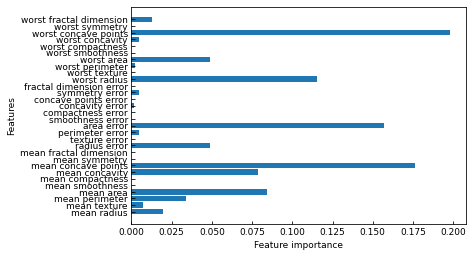

In [ ]:
def plot_feature_importances_cancer(model):
  plt.rcParams['font.size'] = 9
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features),clf.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Features")

plot_feature_importances_cancer(clf)

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.8.0


In [ ]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [ ]:
# 単語を整数にマッピングする辞書
word_index = imdb.get_word_index()

# インデックスの最初の方は予約済み
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh